In [1]:
import torch as t
import cv2
from utilities.data_loader import CustomDataset, PatchCIFAR100, CustomDatasetInnerPatches, InnerPatchCIFAR100
from torch.utils.data import DataLoader
from torchvision import transforms as T
# from models.patchAE import PatchAutoEncoder
from models.ResnetPatchAE import PatchAutoEncoder
# from models.smallPatchAE import SmallPatchAutoEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
history_path = './history/history_resent_patch_ae_l2_0001_cifar_100_8_augmented_0.csv'
loss_df = pd.read_csv(history_path)
loss_df.head()

,Loss
0,0.022592
1,0.014508
2,0.015809
3,0.007296
4,0.012095


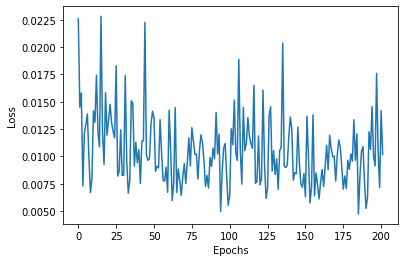

In [3]:
loss = loss_df['Loss']
plt.figure(figsize=(6, 4))
plt.plot(list(range(0, len(loss))), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [4]:
testing_data_path = '../data/testing_dataset/*.JPEG'
grid_size = 4
batch_size = 10
transforms = T.Compose(
            [T.ToPILImage(),
             T.ToTensor(),            
             ])
cuda = True

In [5]:
data = PatchCIFAR100(transforms=transforms, 
                     grid_size=grid_size,
                     root='data', train=False, 
                     )

test_data = DataLoader(data, 
                      batch_size=batch_size, 
                      shuffle=False)

print(len(test_data))


1000


In [6]:
epoch_num = 200
model = PatchAutoEncoder(in_channels=3, out_channels=64, flatten=True)

ckp = t.load('./ckpts/cifar_100/resnet_encoder_neighbour_patch_l2_0001_8_augmneted/checkpoint_{:02d}.ckp'.format(epoch_num), 'cuda' if cuda else None)
model.load_state_dict(ckp['state_dict'])
model.eval()

Channels:  [16, 32, 64]
Flatten:  True


<All keys matched successfully>

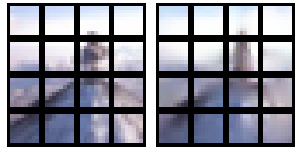

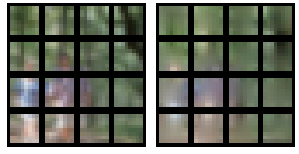

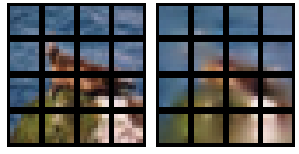

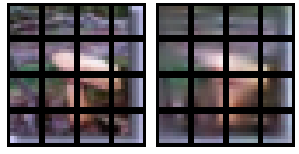

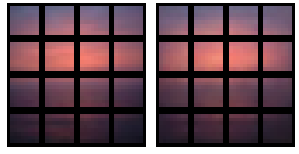

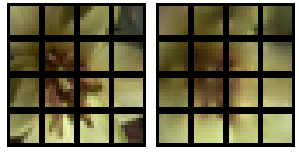

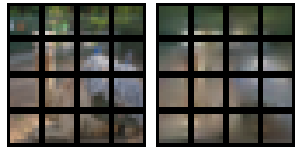

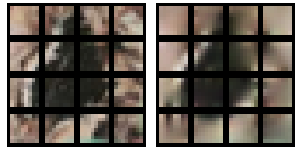

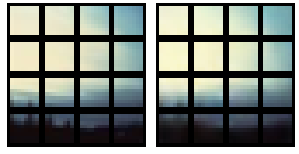

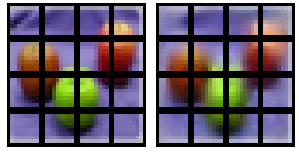

In [7]:
num_patches = 16
step = 0
for img, target in test_data:
    img = img.resize_([img.shape[0]*img.shape[1], img.shape[2], 
                            img.shape[3], img.shape[4], img.shape[5]])
    target = target.resize_((target.shape[0]*target.shape[1], 
                                    target.shape[2], target.shape[3], target.shape[4]))
#     print(target.shape)
    result = model.forward(img).detach()
#     print(result.shape, 'here')
    result = result.reshape((batch_size, num_patches, 
                                        result.shape[1], result.shape[2], result.shape[3]))
    target = target.reshape((batch_size, num_patches, 
                                        result.shape[2], result.shape[3], result.shape[4]))
#     print(target.shape)
    for b in range(10):
        fig = plt.figure(constrained_layout=True, figsize=(4, 2))
        subfigs = fig.subfigures(1, 2, wspace=0.07)

        axsLeft = subfigs[0].subplots(4, 4, sharey=True)
        subfigs[0].set_facecolor('k')

    
        m=0
        for i in range(4):
            for j in range(4):

                axsLeft[i, j].imshow(target[b, m].numpy().transpose(1, 2, 0))
                axsLeft[i, j].axis('off')
                m+=1
            
        axsRight = subfigs[1].subplots(4, 4, sharey=True)
        subfigs[1].set_facecolor('k')
        m=0
        for i in range(4):
            for j in range(4):
                
                axsRight[i, j].imshow(result[b, m].numpy().transpose(1, 2, 0))
                axsRight[i, j].axis('off')
                m+=1
        plt.show()
        
    break